# Assignment 4


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/car data.csv')

In [5]:
print(df)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.shape

(301, 9)

In [8]:
df.isnull()

Car_Name   Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       False  False          False          False       False      False   
1       False  False          False          False       False      False   
2       False  False          False          False       False      False   
3       False  False          False          False       False      False   
4       False  False          False          False       False      False   
..        ...    ...            ...            ...         ...        ...   
296     False  False          False          False       False      False   
297     False  False          False          False       False      False   
298     False  False          False          False       False      False   
299     False  False          False          False       False      False   
300     False  False          False          False       False      False   

     Seller_Type  Transmission  Owner  
0          False         False  False  
1          False         False  False  
2          False         False  False  
3          False         False  False  
4          False         False  False  
..           ...           ...    ...  
296        False         False  False  
297        False         False  False  
298        False         False  False  
299        False         False  False  
300        False         False  False  

[301 rows x 9 columns]

In [9]:
df.min()

Car_Name               800
Year                  2003
Selling_Price          0.1
Present_Price         0.32
Kms_Driven             500
Fuel_Type              CNG
Seller_Type         Dealer
Transmission     Automatic
Owner                    0
dtype: object

In [11]:
df.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

<ipython-input-12-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

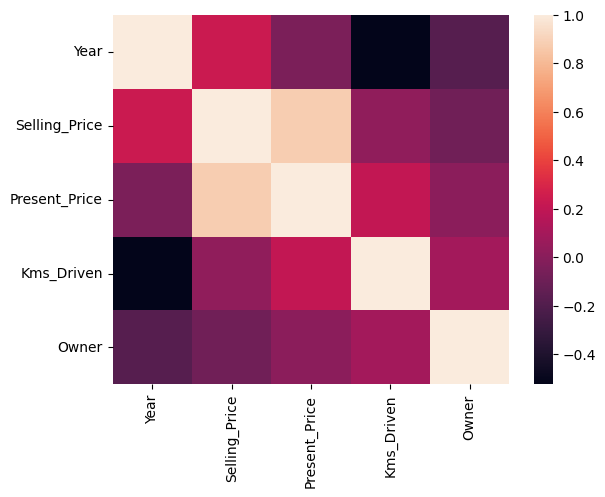

In [12]:
sns.heatmap(df.corr())

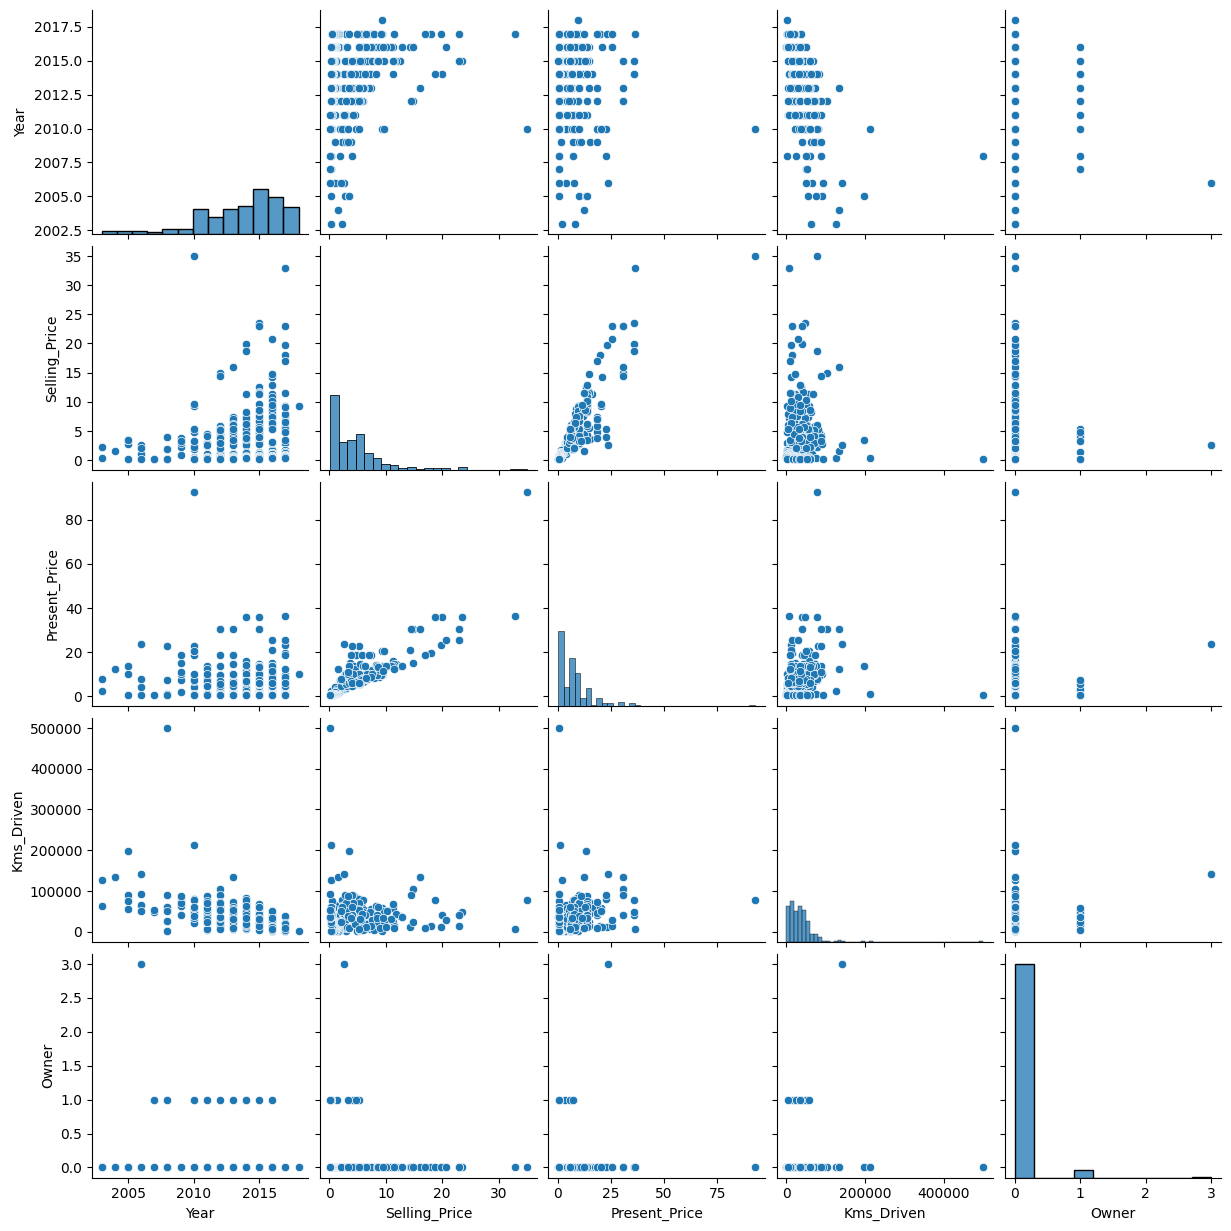

In [13]:
sns.pairplot(df)

In [14]:
X=df[['Year','Selling_Price','Present_Price','Kms_Driven']]
y=df['Owner']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm=LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
#print the intercept
print(lm.intercept_)

39.6547048546031


In [21]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Year          -1.965681e-02
Selling_Price  5.740177e-03
Present_Price -4.859181e-03
Kms_Driven    -5.726999e-07

In [22]:
predictions=lm.predict(X_test)

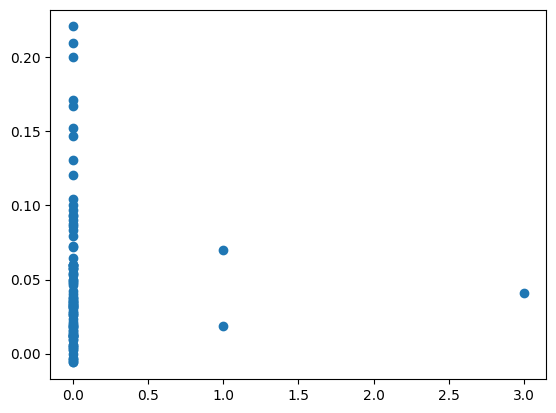

In [23]:
plt.scatter(y_test,predictions)

In [24]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [25]:
df.corr()

<ipython-input-25-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           1.000000       0.236141      -0.047584   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878983    0.029187 -0.088344
Present_Price -0.047584       0.878983       1.000000    0.203647  0.008057
Kms_Driven    -0.524342       0.029187       0.203647    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008057    0.089216  1.000000

<ipython-input-26-79d59cfc256a>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Kms_Driven'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

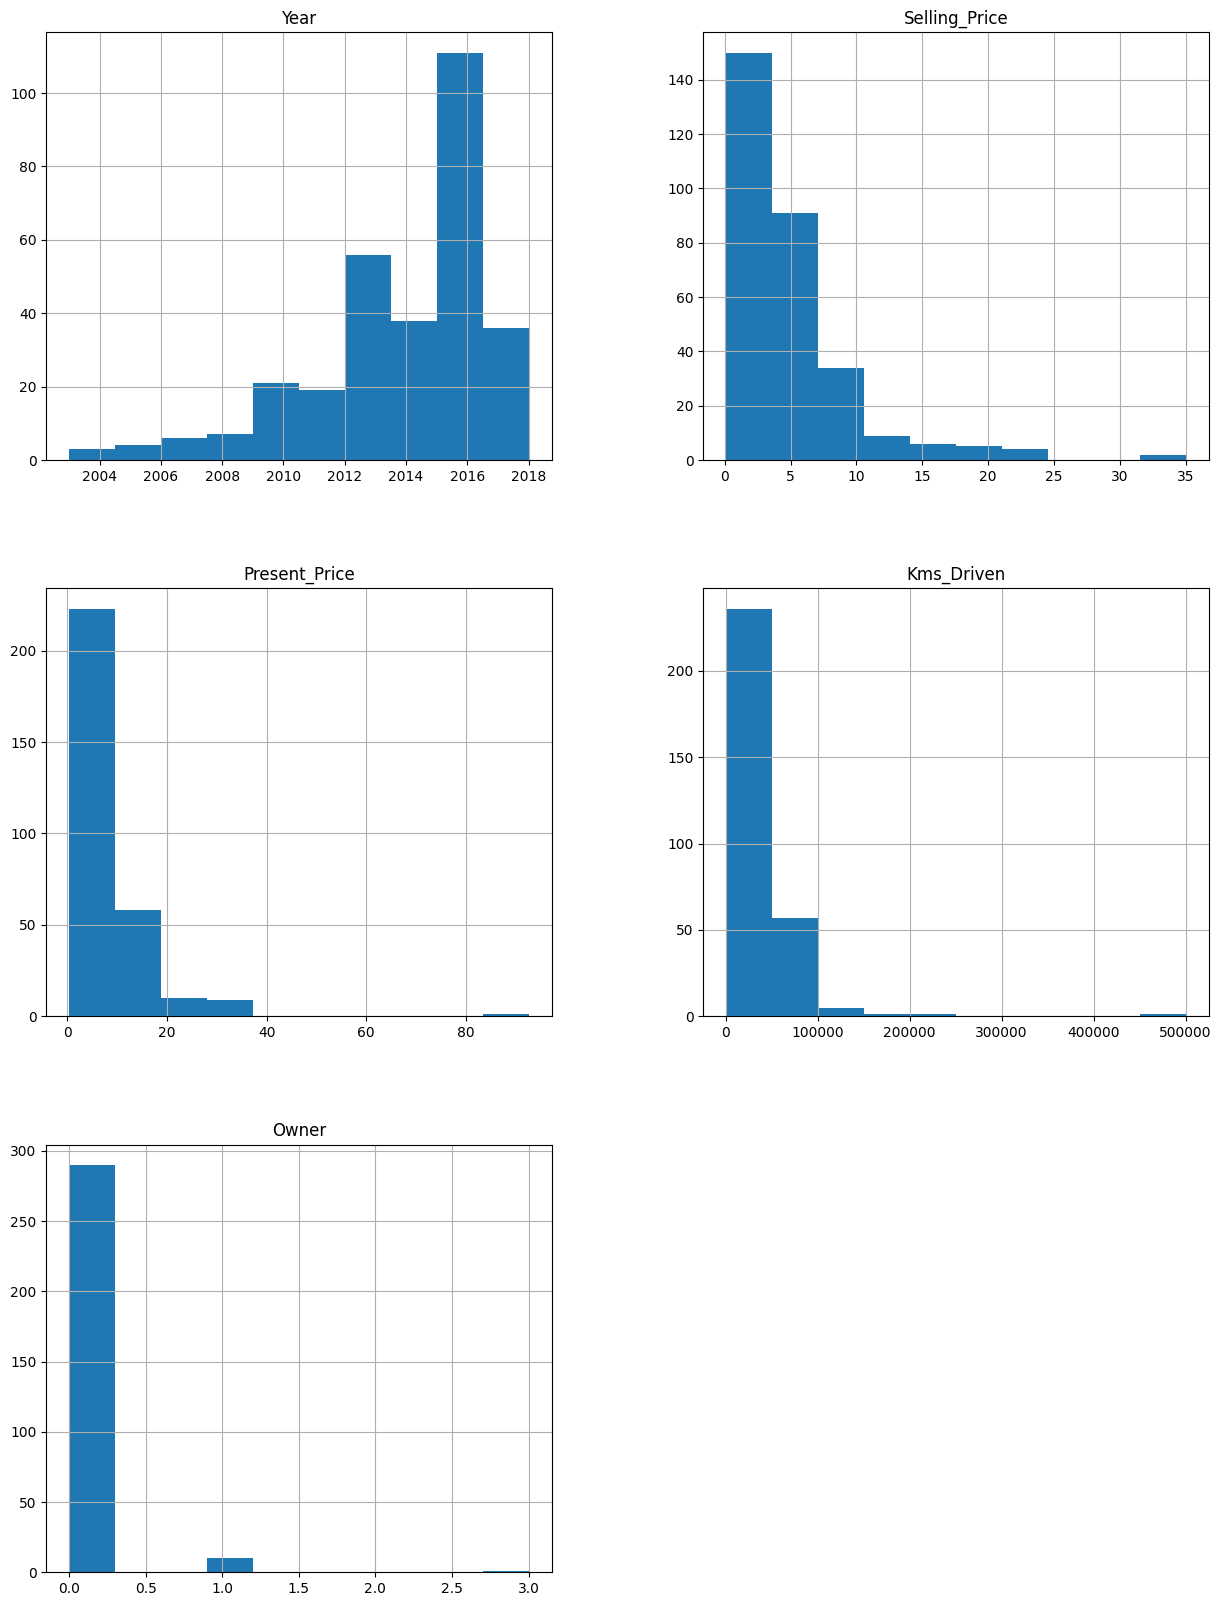

In [26]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [27]:
df.Selling_Price

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [28]:
df.Present_Price

0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 301, dtype: float64

In [29]:
df = df.dropna()
df.isna().sum()
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

<Axes: xlabel='Kms_Driven', ylabel='count'>

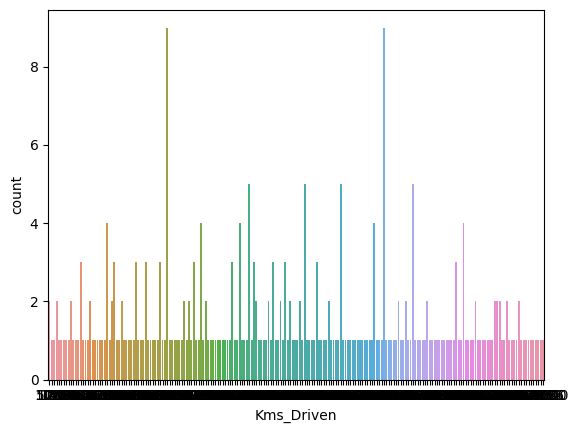

In [30]:
sns.countplot(x='Kms_Driven',data=df)

In [31]:
df.corr()

<ipython-input-31-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           1.000000       0.236141      -0.047584   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878983    0.029187 -0.088344
Present_Price -0.047584       0.878983       1.000000    0.203647  0.008057
Kms_Driven    -0.524342       0.029187       0.203647    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008057    0.089216  1.000000

In [32]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [33]:
df.min()

Car_Name               800
Year                  2003
Selling_Price          0.1
Present_Price         0.32
Kms_Driven             500
Fuel_Type              CNG
Seller_Type         Dealer
Transmission     Automatic
Owner                    0
dtype: object

In [34]:
df.max()

Car_Name              xcent
Year                   2018
Selling_Price          35.0
Present_Price          92.6
Kms_Driven           500000
Fuel_Type            Petrol
Seller_Type      Individual
Transmission         Manual
Owner                     3
dtype: object

In [35]:
df.isnull()

Car_Name   Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       False  False          False          False       False      False   
1       False  False          False          False       False      False   
2       False  False          False          False       False      False   
3       False  False          False          False       False      False   
4       False  False          False          False       False      False   
..        ...    ...            ...            ...         ...        ...   
296     False  False          False          False       False      False   
297     False  False          False          False       False      False   
298     False  False          False          False       False      False   
299     False  False          False          False       False      False   
300     False  False          False          False       False      False   

     Seller_Type  Transmission  Owner  
0          False         False  False  
1          False         False  False  
2          False         False  False  
3          False         False  False  
4          False         False  False  
..           ...           ...    ...  
296        False         False  False  
297        False         False  False  
298        False         False  False  
299        False         False  False  
300        False         False  False  

[301 rows x 9 columns]

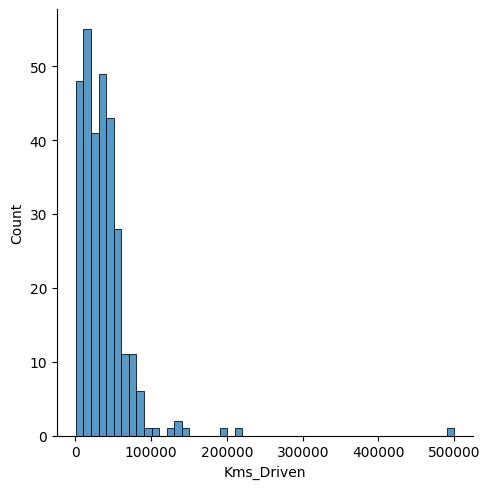

In [36]:
sns.displot(df['Kms_Driven'])

<ipython-input-37-5fedec88925e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.pairplot(df.corr())


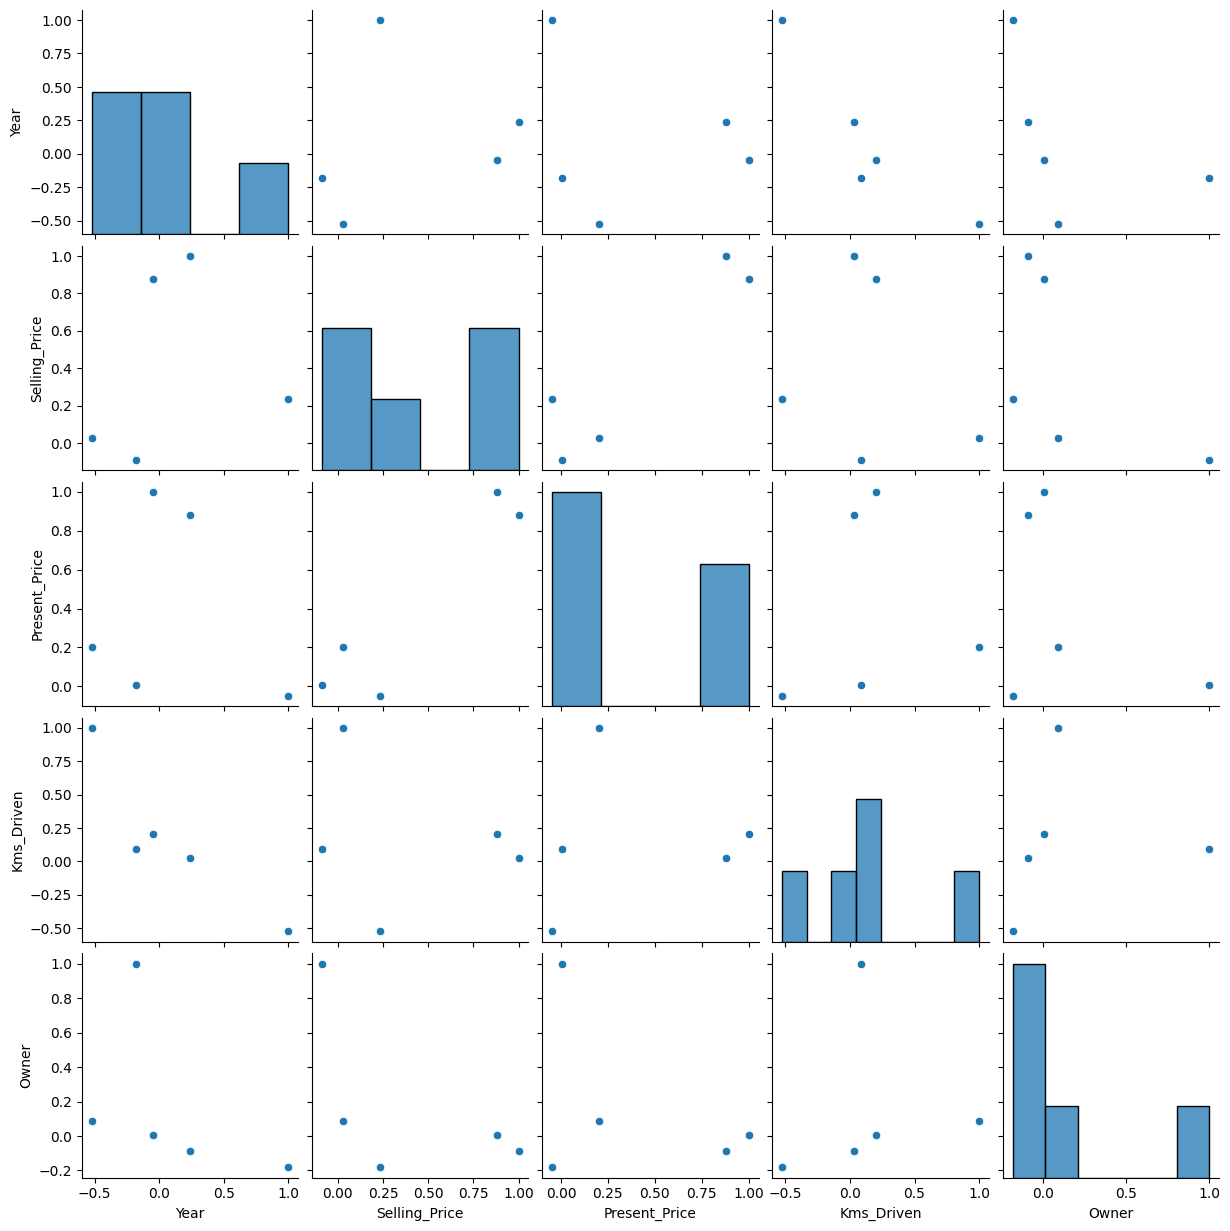

In [37]:
sns.pairplot(df.corr())